<a href="https://colab.research.google.com/github/harsita21/SID-2023/blob/main/Copy_of_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the below cell to download the csv and file into your colab/jupyter notebook and start working with it. You will be needing this for completing the task.

In [ ]:
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2023-11-03 12:58:04--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2023-11-03 12:58:04 (3.87 MB/s) - ‘titanic.csv’ saved [61194/61194]



## Task: Machine Learning Model for Titanic Survival Prediction

### Introduction:
In this task, you will work on the Titanic dataset, a famous dataset in the field of machine learning. The goal is to build a machine learning model that predicts whether a passenger on the Titanic survived or not. The dataset contains various features, and you will need to perform several key tasks in the machine learning pipeline.

### Instructions:

1. **Data Preprocessing:**
    - Load the Titanic dataset.
    - Handle missing values in the dataset.
    - Encode categorical features (e.g., one-hot encoding or label encoding).
    - Split the data into training and testing sets.

2. **Exploratory Data Analysis (EDA):**
    - Perform exploratory data analysis to understand the dataset.
    - Visualize the data to gain insights into passenger demographics and their survival rates.
    - Identify any interesting patterns or correlations between features and survival.

3. **Outlier Detection and Removal:**
    - Detect and deal with outliers in the dataset.
    - Explain the approach you used for outlier detection and removal.

4. **Data Extraction:**
    - Create any new features or transformations that you believe might be useful for improving the model's performance.
    - Justify the choice of these new features or transformations.

5. **Model Selection:**
    - Choose a machine learning algorithm for classification. Suggest at least three common classification algorithms (e.g., Logistic Regression, Random Forest, Support Vector Machine).
    - Explain your rationale for selecting the chosen algorithms.

6. **Model Building and Hyperparameter Tuning:**
    - Implement the selected machine learning algorithms and train them on the training data.
    - Perform hyperparameter tuning for each algorithm to optimize their performance.
    - Clearly specify the hyperparameters you tuned and the methodology used.

7. **Model Evaluation:**
    - Evaluate the performance of each model using accuracy as the primary metric.
    - Compare the models and choose the best-performing model for the final predictions.
    - Report the accuracy score for the chosen model on the testing data.

8. **Conclusion:**
    - Summarize your findings and the key steps in the machine learning pipeline.
    - Reflect on any challenges you encountered and how you addressed them.

### Submission:
Submit your code, along with a report explaining the steps you took, the reasoning behind your choices, and the accuracy score achieved on the test dataset.

Good luck, and may your machine learning model effectively predict Titanic passenger survival!


In [ ]:
# your code starts here
#SID 2023
#Author: Harsita Mohanty
#Load the Titanic dataset.
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')#read the provided csv file here
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
#these columns are dropped because they are not useful in following analysis
#using train test split
#Split the data into training and testing sets.
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [ ]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
# imputation transformer
#Handle missing values in the dataset.
from sklearn.compose import ColumnTransformer
trfr1 = ColumnTransformer([('impute_age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer (strategy= 'most_frequent'),[6]) ]
, remainder='passthrough')

In [ ]:
# performing one hot encoding
#Encode categorical features (e.g., one-hot encoding or label encoding).
trfr2=ColumnTransformer([('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])],remainder='passthrough')

In [ ]:
#scaling
trfr3=ColumnTransformer([('scale',MinMaxScaler(),slice(0,10))])

In [ ]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
trfr4=SelectKBest(score_func=chi2,k=8)

In [ ]:
#training the model
trfr5=DecisionTreeClassifier()

In [ ]:
#creating pipeline
from sklearn.pipeline import Pipeline,make_pipeline
pipe=Pipeline([
    ('trfr1',trfr1),
    ('trfr2',trfr2),
    ('trfr3',trfr3),
    ('trfr4',trfr4),
    ('trfr5',trfr5),
])

In [ ]:
#train
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trfr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trfr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trfr3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trfr4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7b8dfa686e60>)),
                ('trfr5', DecisionTreeClassifier())])

In [ ]:
#predict
y_pred=pipe.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#accuracy

0.6256983240223464

In [ ]:
#Exploratory Data Analysis (EDA)
#Perform exploratory data analysis to understand the dataset.
#Visualize the data to gain insights into passenger demographics and their survival rates.
#Identify any interesting patterns or correlations between features and survival.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

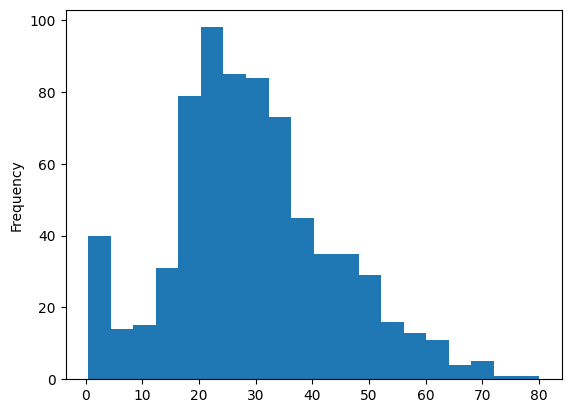

In [ ]:
#histogram
df['Age'].plot(kind='hist',bins=20)
plt.grid(False)
plt.show()

<Axes: ylabel='Density'>

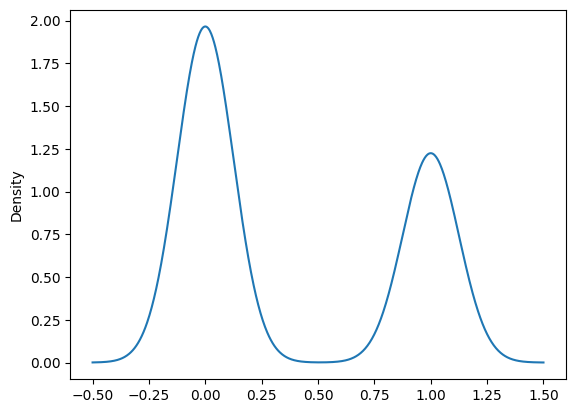

In [ ]:
#kernel density plot
df['Survived'].plot.kde()

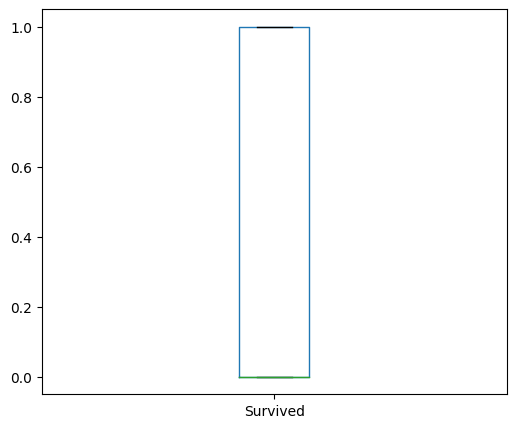

In [ ]:
df.boxplot(column="Survived",figsize=(6,5))
plt.grid(False)

Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

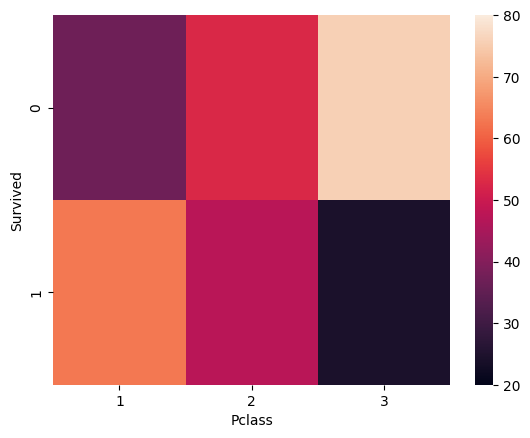

In [ ]:
crosstab=pd.crosstab(df.Survived, df.Pclass,normalize=('columns'))
crosstab=crosstab*100
print(crosstab)
sns.heatmap(crosstab, annot=False,vmin=20,vmax=80)

In [ ]:
crosstab=pd.crosstab(df.Survived, df.Sex, normalize=('columns'))
crosstab=(crosstab1*100)
crosstab

Sex,female,male
Survived,,
0,2579.617834,8110.918544
1,7420.382166,1889.081456


In [ ]:
correlation=df[['Age','Fare']].corr()
correlation

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [ ]:
cross_tab=pd.crosstab(df['Pclass'],df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [ ]:
#end of explorative data analysis
#observation:we got to know the various relations and overview of data, how 'survived' column is related to others

In [ ]:
#Outlier Detection and Removal
from scipy import stats
z_scores = stats.zscore(df['Fare'])
threshold = 2
# The threshold is adjusted as needed
outliers = df[abs(z_scores) > threshold]

from scipy.stats.mstats import winsorize
df['Fare'] = winsorize(df['Fare'], limits=[0.05, 0.05])
df['Fare'] = np.log1p(df['Fare'])
df = df[(z_scores < threshold) & (z_scores > -threshold)]
outliers = df[abs(z_scores) > threshold]

<ipython-input-115-8ce58b8bc373>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[abs(z_scores) > threshold]


In [ ]:
#Model Selection:Choose a machine learning algorithm for classification.
#Suggest at least three common classification algorithms (e.g., Logistic Regression, Random Forest, Support Vector Machine).
#Logistic Regression
from sklearn.linear_model import LogisticRegression
encoder = OneHotEncoder(sparse=False)
X_train= encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
# Create an instance of the model
model = LogisticRegression()
# Train the model
model.fit(X_train,y_train)
#this algorithm was selected because Logistic regression is easier to implement, interpret, and very efficient to train. It provides useful insights.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

LogisticRegression()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
#This algorithm was chosen since it performs well even if the data contains null/missing values. It automates missing values present in the data.
#It works well with both categorical and continuous values.

RandomForestClassifier()

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
#this algorithm is preferred since SVM is relatively memory efficient and works relatively well when there is a clear margin of separation between classes.
#It is more effective in high dimensional spaces.

SVC()

In [ ]:
#Model Building and Model Evaluation and prediction
#LogisticRegression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_test,y_test)
model.predict_proba(X_test)
#logistic regression does not really have any critical hyperparameters to tune

array([[0.46006881, 0.53993119],
       [0.78623885, 0.21376115],
       [0.98353032, 0.01646968],
       [0.10249986, 0.89750014],
       [0.09841744, 0.90158256],
       [0.06564573, 0.93435427],
       [0.20224908, 0.79775092],
       [0.95920181, 0.04079819],
       [0.1543337 , 0.8456663 ],
       [0.00253084, 0.99746916],
       [0.83933858, 0.16066142],
       [0.96222811, 0.03777189],
       [0.91274825, 0.08725175],
       [0.95623805, 0.04376195],
       [0.7842598 , 0.2157402 ],
       [0.02942141, 0.97057859],
       [0.08717814, 0.91282186],
       [0.15771174, 0.84228826],
       [0.95495142, 0.04504858],
       [0.85259384, 0.14740616],
       [0.99613401, 0.00386599],
       [0.07041908, 0.92958092],
       [0.2575448 , 0.7424552 ],
       [0.98626978, 0.01373022],
       [0.96526604, 0.03473396],
       [0.98338388, 0.01661612],
       [0.82085767, 0.17914233],
       [0.75075704, 0.24924296],
       [0.96485135, 0.03514865],
       [0.6190849 , 0.3809151 ],
       [0.

In [ ]:
model.predict(X_test)


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [ ]:
model.score(X_test,y_test)
#accuracy

0.9776536312849162

In [ ]:
#Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=0, verbose=0, warm_start=False)
model = RandomForestClassifier(random_state=0).fit(X_test,y_test)
model.predict_proba(X_test)

array([[0.16, 0.84],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.17, 0.83],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.98, 0.02],
       [0.08, 0.92],
       [0.02, 0.98],
       [0.75, 0.25],
       [0.93, 0.07],
       [0.81, 0.19],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [0.02, 0.98],
       [0.17, 0.83],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.87, 0.13],
       [0.43, 0.57],
       [0.91, 0.09],
       [0.65, 0.35],
       [1.  , 0.  ],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.75, 0.25],
       [0.29, 0.71],
       [0.92, 0.08],
       [0.29, 0.71],
       [0.02, 0.98],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  ,

In [ ]:
model.predict(X_test)


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [ ]:
model.score(X_test,y_test)
#accuracy

1.0

In [ ]:
#Support Vector Machine
{'C': 5, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0,decision_function_shape='ovr', degree=4, gamma=0.1,
    kernel='poly', max_iter=-1, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model = SVC(random_state=0,probability=True).fit(X_test,y_test)
model.predict_proba(X_test)

array([[0.77619373, 0.22380627],
       [0.8621644 , 0.1378356 ],
       [0.87430391, 0.12569609],
       [0.17108473, 0.82891527],
       [0.20776863, 0.79223137],
       [0.13089733, 0.86910267],
       [0.24563136, 0.75436864],
       [0.87351343, 0.12648657],
       [0.24611815, 0.75388185],
       [0.12155582, 0.87844418],
       [0.75406266, 0.24593734],
       [0.87056055, 0.12943945],
       [0.29675689, 0.70324311],
       [0.86459355, 0.13540645],
       [0.84646487, 0.15353513],
       [0.12153635, 0.87846365],
       [0.6700635 , 0.3299365 ],
       [0.24090624, 0.75909376],
       [0.86474231, 0.13525769],
       [0.78197836, 0.21802164],
       [0.88518346, 0.11481654],
       [0.68157406, 0.31842594],
       [0.22671704, 0.77328296],
       [0.87430391, 0.12569609],
       [0.87607009, 0.12392991],
       [0.86852194, 0.13147806],
       [0.75835766, 0.24164234],
       [0.85751022, 0.14248978],
       [0.86459655, 0.13540345],
       [0.29002832, 0.70997168],
       [0.

In [ ]:
model.predict(X_test)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [ ]:
model.score(X_test,y_test)
#accuracy

0.7821229050279329


Comparing the accuracy of all three models,
Logistic Regression: 0.9776536312849162
Random Forest: 1.0
Support Vector Machine: 0.7821229050279329
Random Forest algorithm provides the highest accuracy of 1.0.
Keeping the advantages and disadvantages of all the models in mind,
Random Forest proves to be the most efficient and helpful method in predicting the desired outcome. It reduces overfitting in decision trees and helps to improve the accuracy
It is flexible to both classification and regression problems
It works well with both categorical and continuous values
It automates missing values present in the data
Normalising of data is not required as it uses a rule-based approach.
Hence it is the best option of the available choices.

Summary: The use of pipelines made it very easy to go through the process of model making and further steps. The explorative data analysis(EDA) of the titanic dataset helped create a firm notion of the distribution of data and relation of all other parameters with the 'survived' column. Missing values were added, data modification took place successfully and outliers were detected and removed. I learned about three methods of model prediction which were very efficent and finally made a ml model for the first time.
Challenges: I initially had some issues understanding how to use pipelines and with model making. I also faced some difficulty while attempting to imrpove the performance of the model. I was successful in treating missing values, outlier values and feature selection. I also used multiple algorithms to test the accuracy of the models. Other methods such as adding more data will be a task I learn from in the future. But the resources provided by SID 2023 and the sincere help by the mentors helped me proceed smoothly. Thanking SID 2023 for this wonderful opportunity to learn so much about Machine learning through this drive.